<a href="https://colab.research.google.com/github/mdaugherity/Numerical2022/blob/main/ode/Week_10_IVP_Fits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PHYS 351, Fall 2022, Dr. Daugherity** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit

# IVP Fitting Demo
Suppose your ODE has a parameter that can be adjusted to fit data points.  This example shows how to combine *solve_ivp* and *curve_fit* together.

Recall that *curve_fit* requires a function **f(x,p)** which returns the y-values at the given x-values for the parameters p.  We need to make this function call *solve_ivp* using *t_eval* to return the proper values.

In this example, we are doing free-fall $y''=-g$ for an object being dropped from rest.  We will adjust gravity to fit the data

In [3]:
# Make fake data
g_true = -10
TMAX = 5
tdata = np.arange(0,TMAX)
y0 = 100
ydata = y0 + 0.5 * g_true * tdata**2

def f(t, yvec, a):  # solve_ivp derivative function
  y = yvec[0]
  v = yvec[1]
  #a = -9.8
  v0 = 0 
  return [v, a]

def calc_ivp(t, a):  # function for curve_fit
  # uses solve_ivp to calculate pos at given times with acceleration a
  tspan = [0,TMAX]
  y0vec = [y0, 0]   # initial pos and vel
  ivp = solve_ivp(f, tspan, y0vec, t_eval=tdata, args=[a])
  y = ivp.y[0]
  return y

p0 = [0]  # initial guess
popt, pcov = curve_fit(calc_ivp, tdata, ydata, p0)

print('TRUE\t', g_true)
print('FIT\t',popt[0])

TRUE	 -10
FIT	 -10.000000000000002


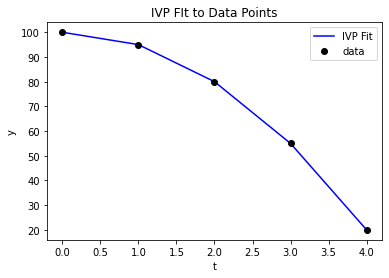

In [6]:
# Make a lovely plot

y =calc_ivp(tdata, popt[0])
plt.plot(tdata, y, 'b-', label='IVP Fit')
plt.plot(tdata, ydata, 'ko', label='data')

plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('IVP FIt to Data Points')
plt.show()